## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
import datetime
warnings.filterwarnings('ignore')

# To get the verison details of the library used

print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(sm.__version__)

1.20.3
1.3.4
0.11.2
0.12.2


In [2]:
# loading the loan.csv file 
bike = pd.read_csv("day.csv")

# check the total count of rows and columns
print(bike.shape)

# to access the first n rows of the file
print(bike.head())

(730, 16)
   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2018       1   0     1        0        6           0   
1        2  2/1/2018       1   0     1        0        0           0   
2        3  3/1/2018       1   0     1        0        1           1   
3        4  4/1/2018       1   0     1        0        2           1   
4        5  5/1/2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
# to get the information

print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [4]:
# to get the statistical information

print(bike.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

## To chech null value and duplicate value

In [5]:
# to check the if the there is row or column with null value

print("Number of row with NA value: ",bike.isnull().all(axis=1).sum())

print("Number of column with NA value: ",bike.isnull().all(axis=0).sum())

Number of row with NA value:  0
Number of column with NA value:  0


In [6]:
# Create a dummy dataframe (copy of original bike df) for duplicate check
bike_dummy = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dummy.drop_duplicates(subset=None, inplace=True)

In [7]:
print(bike_dummy.shape)

(730, 16)


Insights: There is no null value in row or column and there is no duplicate values.

## Data cleaning

In [8]:
bike_clean=bike.iloc[:,1:16]

for col in bike_clean:
    print(bike_clean[col].value_counts(), '\n')
    
#Checking value_counts() for entire dataframe. This will help to identify any Unknow/Junk values in the dataset.

1/1/2018      1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
3/9/2018      1
4/9/2018      1
5/9/2018      1
6/9/2018      1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

0    365
1    365
Name: yr, dtype: int64 

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           .

Insights: There seems to be no Junk/Unknown values in the entire dataset.

## Removing unwanted data

The following variables can be removed from analysis as they serve no important purpose.

1. instant
2. dteday
3. casual
4. registered

Creating new dataframe as bike_update. So the bike can be used, if further analysis is required. 

In [9]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
bike_update = bike[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 
                    'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [11]:
bike_update.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Dummy variable creation

Let's create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [12]:
#before creating dummy varibale, convert 'mnth', 'weekday', 'season' & 'weathersit' to "Category" data type.

bike_update['season']=bike_update['season'].astype('category')
bike_update['weathersit']=bike_update['weathersit'].astype('category')
bike_update['mnth']=bike_update['mnth'].astype('category')
bike_update['weekday']=bike_update['weekday'].astype('category')
bike_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [13]:
# creating the dummy variable and drop the original variable for which the dummy variables are created.

bike_update = pd.get_dummies(bike_update, drop_first=True)

# visualisation the changes after the dummy creation

bike_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [14]:
bike_update.shape

(730, 30)

## Splitting the data

Splitting the data to Train and Test: We will now split the data into TRAIN and TEST (70:30 ratio) 

We will use train_test_split method from sklearn package for this.

In [15]:
# Checking the data shape before splitting

bike_update.shape

(730, 30)

In [16]:
# Checking the data info before spliting

bike_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [17]:
from sklearn.model_selection import train_test_split

# Lets specify "random_state" so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_update, train_size = 0.70, test_size = 0.30, random_state = 333)

In [18]:
# Verifying df_train shape after the split

df_train.shape

(510, 30)

In [19]:
# Verifying df_train info after the split

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [20]:
# Verifying df_test shape after the split

df_test.shape

(219, 30)

In [21]:
# Verifying df_test info after the split

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

## Exploratory Data Analysis

We need to perform the EDA on TRAINING (df_train) Dataset.

In [22]:
# Checking the columns in df_train

df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

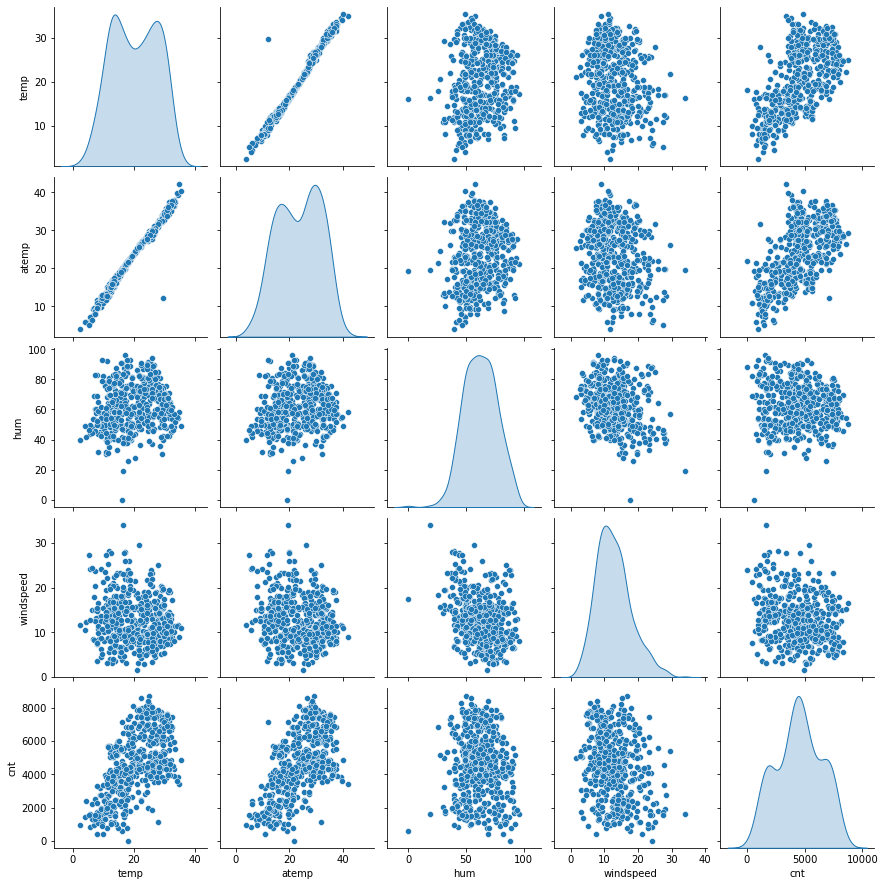

In [23]:
# Create a new dataframe of only numeric variables:

bike_numeric = df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_numeric, diag_kind='kde')
plt.show()

Insight: The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

## Visualising Catagorical Variables

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

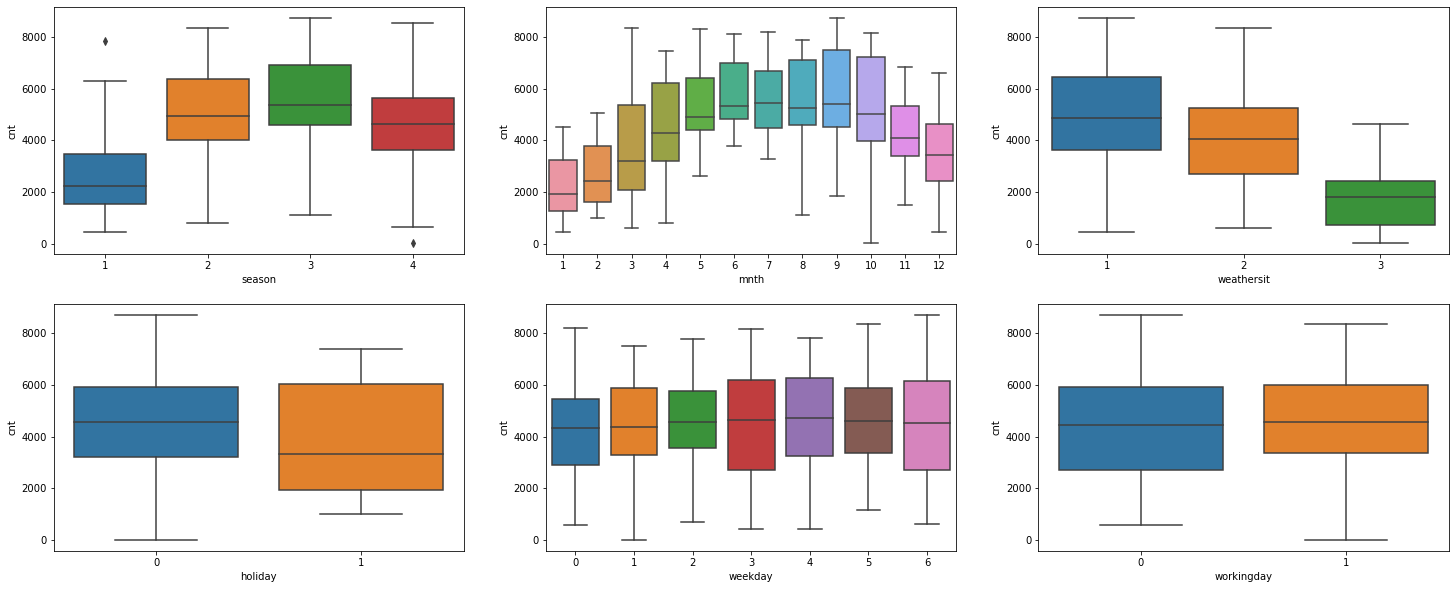

In [25]:
# Building boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

Insight: 
1) Season: More bikes are rent during ‘3rd season’ with median of over 5000 booking (for the period of 2 years). This followed by ‘2nd and 4th season’. This indicates, season can be a good predictor for the dependent variable

2) Month: More bike bookings were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, ‘mnth’ has some trend for bookings and can be a good predictor for the dependent variable

3) weathersit: Most of the bike bookings were happening during ‘weathersit1’ with a median of close to 5000 booking. This was followed by ‘weathersit2’. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable

4) Holiday: There is not much bike bookings were happening in holidays. This indicates, holiday cannot be a good predictor for the dependent variable

5) weekday: weekday variable shows very close trend to the total booking on all days of the week with medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not

6) workingday: Most of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Correlation Matrix

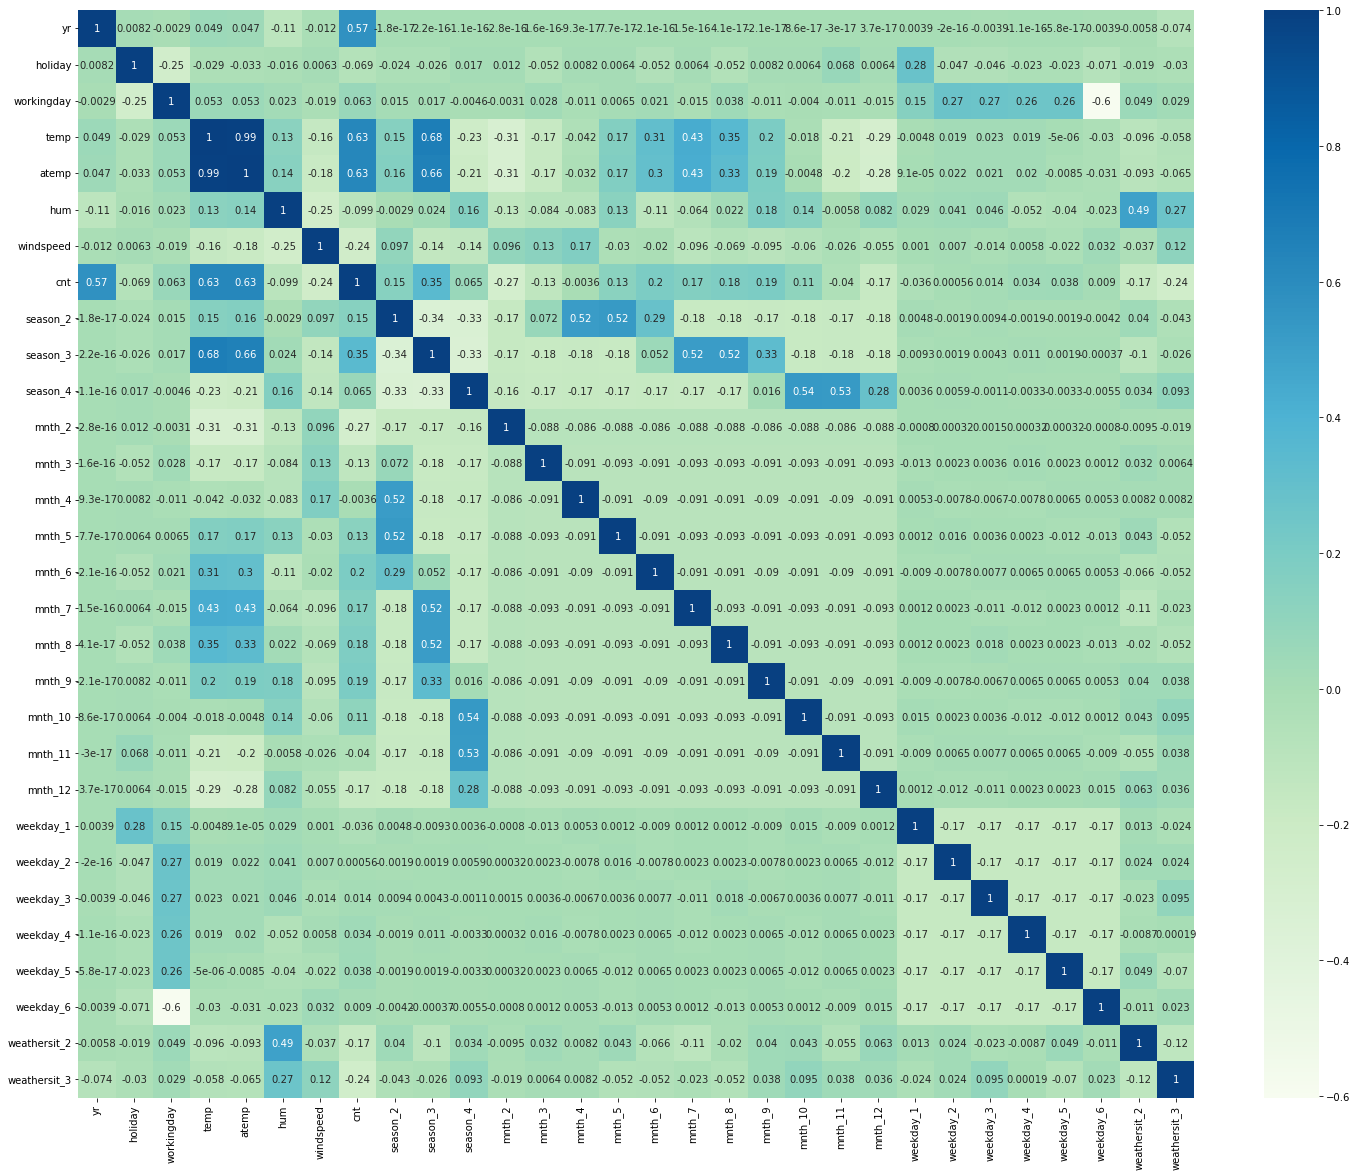

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated. 
# Note:here im considering only those variables (dataframe: bike_update) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_update.corr(), annot = True, cmap="GnBu")
plt.show()

Insight: The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## Rescaling the features

In [27]:
scaler = MinMaxScaler()

In [28]:
# Checking the values before scaling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [30]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
# Checking values after scaling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building a Linear Model

Dividing into X and Y sets for the model building

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

## Recursive feature elimination

Currently, we have almost 30 Predictors to Predict our outcome. Analysing these many predictors can be hard.

To simplify this process, we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome)

We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0.

Creating a generalised function for evaluating Variance Inflation Factor

In [34]:
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [36]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
25,weekday_5,True,1
24,weekday_4,True,1
23,weekday_3,True,1
22,weekday_2,True,1
21,weekday_1,True,1
17,mnth_9,True,1
9,season_4,True,1
28,weathersit_3,True,1
7,season_2,True,1


### Model 1

In [37]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          1.87e-177
Time:                        14:36:50   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597      0.000       0.212       0.321
yr               0.2257      0.009     26.432      0.000       0.209       0.243
holiday         -0.0291      0.025     -1.161      0.246      -0.078       0.020
workingday       0.0121      0.008      1.474      0.141      -0.004       0.028
temp             0.6032      0.020     29.915      0.000       0.564       0.643
hum             -0.2794      0.032     -8.820      0.000      -0.342      -0.217
windspeed       -0.2096      0.028     -7.364      0.000      -0.265      -0.154
season_2         0.0833      0.011      7.832      0.000       0.062       0.104
season_4         0.1389      0.011     12.638      0.000       0.117       0.160
mnth_9           0.1025      0.016      6.349      0.000       0.071       0.134
weekday_1       -0.0218      0.011     -2.077      0.038      -0.042      -0.001
weekday_2       -0.0082      0.011     -0.716      0.474      -0.031       0.014
weekday_3        0.0057      0.011      0.514      0.608      -0.016       0.027
weekday_4        0.0022      0.012      0.186      0.853      -0.021       0.025
weekday_5        0.0052      0.011      0.461      0.645      -0.017       0.027
weathersit_3    -0.2162      0.028     -7.678      0.000      -0.272      -0.161
==============================================================================
Omnibus:                       62.159   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.853
Skew:                          -0.733   Prob(JB):                     1.89e-25
Kurtosis:                       4.792   Cond. No.                     3.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,holiday,inf
1,workingday,inf
2,weekday_1,inf
3,weekday_2,inf
4,weekday_3,inf
5,weekday_4,inf
6,weekday_5,inf
7,hum,10.95
8,temp,7.13
9,windspeed,4.18


The VIF is Infinity, this shows a perfect correlation between two independent variables. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.
So feature 'holiday' is dropped.

### Model 2

In [39]:
col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          1.87e-177
Time:                        14:36:52   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597      0.000       0.212       0.321
yr               0.2257      0.009     26.432      0.000       0.209       0.243
workingday       0.0412      0.029      1.419      0.157      -0.016       0.098
temp             0.6032      0.020     29.915      0.000       0.564       0.643
hum             -0.2794      0.032     -8.820      0.000      -0.342      -0.217
windspeed       -0.2096      0.028     -7.364      0.000      -0.265      -0.154
season_2         0.0833      0.011      7.832      0.000       0.062       0.104
season_4         0.1389      0.011     12.638      0.000       0.117       0.160
mnth_9           0.1025      0.016      6.349      0.000       0.071       0.134
weekday_1       -0.0509      0.029     -1.765      0.078      -0.108       0.006
weekday_2       -0.0373      0.032     -1.163      0.245      -0.100       0.026
weekday_3       -0.0234      0.032     -0.741      0.459      -0.085       0.039
weekday_4       -0.0269      0.032     -0.846      0.398      -0.089       0.036
weekday_5       -0.0239      0.032     -0.753      0.452      -0.086       0.038
weathersit_3    -0.2162      0.028     -7.678      0.000      -0.272      -0.161
==============================================================================
Omnibus:                       62.159   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.853
Skew:                          -0.733   Prob(JB):                     1.89e-25
Kurtosis:                       4.792   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,workingday,32.48
1,hum,10.95
2,weekday_3,8.47
3,weekday_5,8.20
4,weekday_2,8.18
5,weekday_4,7.37
6,temp,7.13
7,weekday_1,6.52
8,windspeed,4.18
9,yr,2.00


Removing the variable 'hum' based on its Very High 'VIF' value. 

Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'workingday' based on general knowledge that it can be an important factor for a business like bike rentals, and wanted to retain 'workingday'.

### Model 3

In [41]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          5.95e-163
Time:                        14:36:54   Log-Likelihood:                 447.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     496   BIC:                            -807.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0828      0.020      4.194      0.000       0.044       0.122
yr               0.2339      0.009     25.634      0.000       0.216       0.252
workingday       0.0340      0.031      1.092      0.275      -0.027       0.095
temp             0.5768      0.021     26.917      0.000       0.535       0.619
windspeed       -0.1436      0.030     -4.867      0.000      -0.202      -0.086
season_2         0.0723      0.011      6.372      0.000       0.050       0.095
season_4         0.1226      0.012     10.529      0.000       0.100       0.145
mnth_9           0.0846      0.017      4.919      0.000       0.051       0.118
weekday_1       -0.0474      0.031     -1.530      0.127      -0.108       0.013
weekday_2       -0.0327      0.034     -0.951      0.342      -0.100       0.035
weekday_3       -0.0170      0.034     -0.502      0.616      -0.084       0.050
weekday_4       -0.0162      0.034     -0.475      0.635      -0.083       0.051
weekday_5       -0.0131      0.034     -0.383      0.702      -0.080       0.054
weathersit_3    -0.2797      0.029     -9.559      0.000      -0.337      -0.222
==============================================================================
Omnibus:                       61.628   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.134
Skew:                          -0.758   Prob(JB):                     2.44e-23
Kurtosis:                       4.613   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,workingday,32.42
1,weekday_3,8.45
2,weekday_5,8.19
3,weekday_2,8.16
4,weekday_4,7.36
5,weekday_1,6.50
6,temp,4.43
7,windspeed,3.60
8,yr,2.00
9,season_2,1.54


In the above model we see that P-Value of "weekday_5" feature is higher than 0.05, which make its co-efficient insignificant.
So, we will proceed ahead with dropping this feature and designing model again.

### Model 4

In [43]:
col = col.drop(['weekday_5'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          4.89e-164
Time:                        14:36:57   Log-Likelihood:                 447.39
No. Observations:                 510   AIC:                            -868.8
Df Residuals:                     497   BIC:                            -813.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0822      0.020      4.180      0.000       0.044       0.121
yr               0.2337      0.009     25.666      0.000       0.216       0.252
workingday       0.0232      0.013      1.746      0.081      -0.003       0.049
temp             0.5767      0.021     26.938      0.000       0.535       0.619
windspeed       -0.1437      0.029     -4.873      0.000      -0.202      -0.086
season_2         0.0723      0.011      6.379      0.000       0.050       0.095
season_4         0.1222      0.012     10.538      0.000       0.099       0.145
mnth_9           0.0849      0.017      4.945      0.000       0.051       0.119
weekday_1       -0.0372      0.016     -2.368      0.018      -0.068      -0.006
weekday_2       -0.0212      0.017     -1.281      0.201      -0.054       0.011
weekday_3       -0.0056      0.016     -0.347      0.729      -0.037       0.026
weekday_4       -0.0048      0.017     -0.287      0.774      -0.038       0.028
weathersit_3    -0.2793      0.029     -9.560      0.000      -0.337      -0.222
==============================================================================
Omnibus:                       61.888   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.037
Skew:                          -0.759   Prob(JB):                     1.55e-23
Kurtosis:                       4.624   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,workingday,5.59
1,temp,4.40
2,windspeed,3.58
3,yr,1.99
4,weekday_3,1.94
5,weekday_2,1.89
6,weekday_4,1.80
7,weekday_1,1.68
8,season_2,1.54
9,season_4,1.35


In the above model we see that P-Value of "weekday_4" feature is higher than 0.05, which make its co-efficient insignificant.
So, we will proceed ahead with dropping this feature and designing model again.

### Model 5

In [45]:
col = col.drop(['weekday_4'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     179.1
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          3.72e-165
Time:                        14:36:59   Log-Likelihood:                 447.35
No. Observations:                 510   AIC:                            -870.7
Df Residuals:                     498   BIC:                            -819.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0822      0.020      4.184      0.000       0.044       0.121
yr               0.2337      0.009     25.693      0.000       0.216       0.252
workingday       0.0212      0.011      1.875      0.061      -0.001       0.043
temp             0.5765      0.021     26.965      0.000       0.535       0.619
windspeed       -0.1439      0.029     -4.889      0.000      -0.202      -0.086
season_2         0.0723      0.011      6.385      0.000       0.050       0.095
season_4         0.1224      0.012     10.563      0.000       0.100       0.145
mnth_9           0.0849      0.017      4.947      0.000       0.051       0.119
weekday_1       -0.0353      0.014     -2.477      0.014      -0.063      -0.007
weekday_2       -0.0190      0.015     -1.292      0.197      -0.048       0.010
weekday_3       -0.0035      0.014     -0.242      0.809      -0.032       0.025
weathersit_3    -0.2798      0.029     -9.610      0.000      -0.337      -0.223
==============================================================================
Omnibus:                       62.068   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.642
Skew:                          -0.760   Prob(JB):                     1.15e-23
Kurtosis:                       4.632   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,4.39
1,workingday,3.97
2,windspeed,3.57
3,yr,1.99
4,season_2,1.54
5,weekday_3,1.53
6,weekday_2,1.50
7,weekday_1,1.39
8,season_4,1.35
9,mnth_9,1.19


In the above model we see that P-Value of 'weekday_2, weekday_3' feature is higher than 0.05, which make its co-efficient insignificant.
So, we will proceed ahead with dropping this feature and designing model again.

### Model 6

In [47]:
col = col.drop(['weekday_3', 'weekday_2'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     218.8
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          3.97e-167
Time:                        14:37:02   Log-Likelihood:                 446.47
No. Observations:                 510   AIC:                            -872.9
Df Residuals:                     500   BIC:                            -830.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0818      0.020      4.168      0.000       0.043       0.120
yr               0.2333      0.009     25.680      0.000       0.215       0.251
workingday       0.0159      0.010      1.619      0.106      -0.003       0.035
temp             0.5764      0.021     26.975      0.000       0.534       0.618
windspeed       -0.1443      0.029     -4.905      0.000      -0.202      -0.087
season_2         0.0732      0.011      6.474      0.000       0.051       0.095
season_4         0.1231      0.012     10.648      0.000       0.100       0.146
mnth_9           0.0857      0.017      5.002      0.000       0.052       0.119
weekday_1       -0.0303      0.013     -2.293      0.022      -0.056      -0.004
weathersit_3    -0.2788      0.029     -9.625      0.000      -0.336      -0.222
==============================================================================
Omnibus:                       63.474   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.138
Skew:                          -0.767   Prob(JB):                     1.21e-24
Kurtosis:                       4.683   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,4.38
1,windspeed,3.57
2,workingday,2.89
3,yr,1.99
4,season_2,1.54
5,season_4,1.35
6,weekday_1,1.20
7,mnth_9,1.19
8,weathersit_3,1.05


From the Model Summary Report we can say that all the p-values of respective features are well under control

Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10
We see that all the features under VIF table are well under control, so we can fix the features available for our model

## Final Model Interpretation

### Hypothesis Testing:

Hypothesis testing states that:

    H0:B1=B2=...=Bn=0

    H1:at least one Bi!=0

From model 6 Coefficient values,

const -> 0.0818

yr -> 0.2333

workingday -> 0.0159

temp -> 0.5764

windspeed -> - 0.1443

season_2 -> 0.0732

season_4 -> 0.1231

mnth_9 -> 0.0857

weekday_1 -> -0.0303

weathersit_3 -> -0.2788

Insight: From the model 6 summary, it is evident that all our coefficients are not equal to zero. So the NULL HYPOTHESIS is rejected

## F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

    F-statistic: 218.8
    Prob (F-statistic): 3.97e-167

The F-Statistics value is 218.8 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant
The equation of best fitted surface based on model 6:

"cnt=0.0818+(yr×0.2333)+(workingday×0.0159)+(temp×0.5764)−(windspeed×0.1443)+(season2×0.0732)+(season4×0.1231)+(mnth9×0.0857)−(weekday_1×0.0303)−(weathersit3×0.2788)"

### Interpretation of Coefficients:

yr: A coefficient value of ‘0.2333’ indicated that an unit increase in yr variable, the bike hiring increases by 0.2333 units.

workingday: A coefficient value of ‘0.0159’ indicated that an unit increase in workingday variable, the bike hiring decreases by 0.0159 units.

temp: A coefficient value of ‘0.5764’ indicated that an unit increase in temp variable, the bike hiring increases by 0.5764 units.

windspeed: A coefficient value of ‘- 0.1443’ indicated that an unit increase in windspeed variable, the bike hiring decreases by 0.1443 units.

season_2: A coefficient value of ‘0.0732’ indicated that an unit increase in season_2 variable, the bike hiring increases by 0.0732 units.

season_4: A coefficient value of ‘0.1231’ indicated that an unit increase in season_4 variable, the bike hiring increases by 0.1231 units.

mnth_9: A coefficient value of ‘0.0857’ indicated that an unit increase in mnth_9 variable, the bike hiring increases by 0.0857 units.

weekday_1: A coefficient value of ‘-0.0303’ indicated that an unit increase in weekday_6 variable, the bike hiring decreases by 0.0303 units.

weathersit_3: A coefficient value of ‘-0.2788’ indicated that an unit increase in Weathersit3 variable, the bike hiring decreases by 0.2788 units.

const: The Constant value of ‘0.0818’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.0818 units.

## Linear Regrssion assumption

### Normally Distributed Error Terms assumption

After building model, we cannot finalise untill we proove the residual analysis wherein we check whether the distribution of Error is around 0 or not.

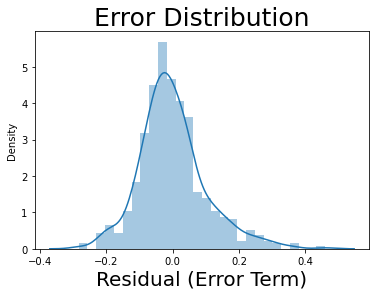

In [49]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

Insight: From the above histogram, we could see that the Residuals are normally distributed. Hence the assumption for Linear Regression is valid.

## There is No Multicollinearity between the predictor variables

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.38
3,windspeed,3.57
1,workingday,2.89
0,yr,1.99
4,season_2,1.54
5,season_4,1.35
7,weekday_1,1.20
6,mnth_9,1.19
8,weathersit_3,1.05


Insight: There is no multicollinearity existing between the predictor variables, as all the VIF values are within permissible range of below 5.

## Making prediction using Final Model

Applying scaler() to all numeric variables in test dataset.

Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data. In other words, we want to prevent the information leak from train to test dataset.

In [51]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [52]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [53]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# Fixing Test Target Variable
y_test = df_test.pop('cnt')

#Fixing Test Feature(s) Variable
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [55]:
# Filtering Test Input (& Reserving Required Features Only)

X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_1     219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [56]:
# Predicting Test Data Using Developed Model

y_test_pred = lr_model.predict(X_test_new)

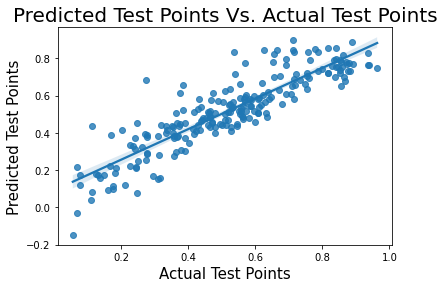

In [57]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

## R-Square value for Test

In [59]:
r2_score(y_test, y_test_pred)

0.7840549953373394

Insight: The R-Square score of the model trained is 0.78, which is not bad. If the value of the r squared score is 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset. This also implies that the closer the value of the r squared score is to 1, the more perfectly the model is trained

# FINAL REPORT

As a result the top predictor based on our model are "temp, yr and weathersit_3". So it is better to give more importance to them, while planning to achieve more bike hiring.